
# Data Generation Script

In [1]:
import random
import pandas as pd
from utils import *
import os


# make directory to hold generated data
os.makedirs('generated_datasets', exist_ok=True)

# Define parameter limits
n_lims = [2, 3]
k_lims = [-0.1, 0]
d_lims = [500e-6, 500e-6]

# Define significant figures for each parameter
n_sig_figs = 6
k_sig_figs = 6
d_sig_figs = 6

# Function to round to significant figures
def round_to_sig_figs(value, sig_figs):
    if value == 0:
        return 0
    return round(value, sig_figs - int(f"{value:.1e}".split('e')[1]) - 1)

# Function to generate a dataset
def generate_dataset(N):
    data = {
        "n": [],
        "k": [],
        "d": []
    }
    for _ in range(N):
        n = random.uniform(*n_lims)
        k = random.uniform(*k_lims)
        d = random.uniform(*d_lims)

        # Apply significant figures
        n = round_to_sig_figs(n, n_sig_figs)
        k = round_to_sig_figs(k, k_sig_figs)
        d = round_to_sig_figs(d, d_sig_figs)

        data["n"].append(n)
        data["k"].append(k)
        data["d"].append(d)

    return pd.DataFrame(data)

# Example usage
N = 20000  # Number of entries
dataset = generate_dataset(N)

In [2]:
dataset.head(10)

,n,k,d
0,2.77944,-0.030612,0.0005
1,2.51967,-0.043999,0.0005
2,2.02665,-0.065920,0.0005
3,2.32635,-0.070425,0.0005
4,2.40251,-0.014170,0.0005
5,2.12875,-0.093855,0.0005
6,2.04369,-0.090239,0.0005
7,2.30195,-0.044454,0.0005
8,2.51781,-0.090709,0.0005
9,2.84399,-0.099959,0.0005


In [3]:
print(f'DataFrame shape: {dataset.shape}')
dataset.describe()

DataFrame shape: (20000, 3)


,n,k,d
count,20000.000000,20000.000000,2.000000e+04
mean,2.500780,-0.050185,5.000000e-04
std,0.286213,0.028860,2.168459e-19
min,2.000080,-0.099994,5.000000e-04
25%,2.254400,-0.075013,5.000000e-04
50%,2.500865,-0.050222,5.000000e-04
75%,2.746230,-0.025266,5.000000e-04
max,2.999970,-0.000018,5.000000e-04


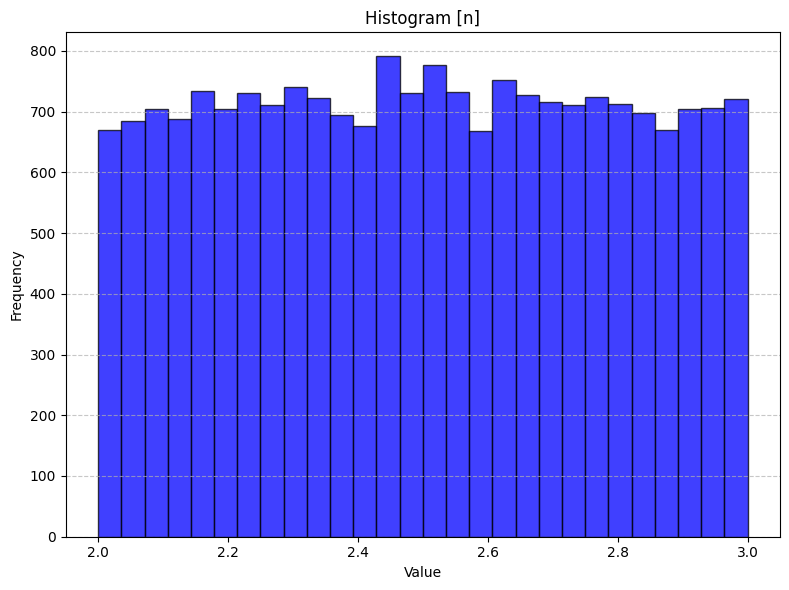

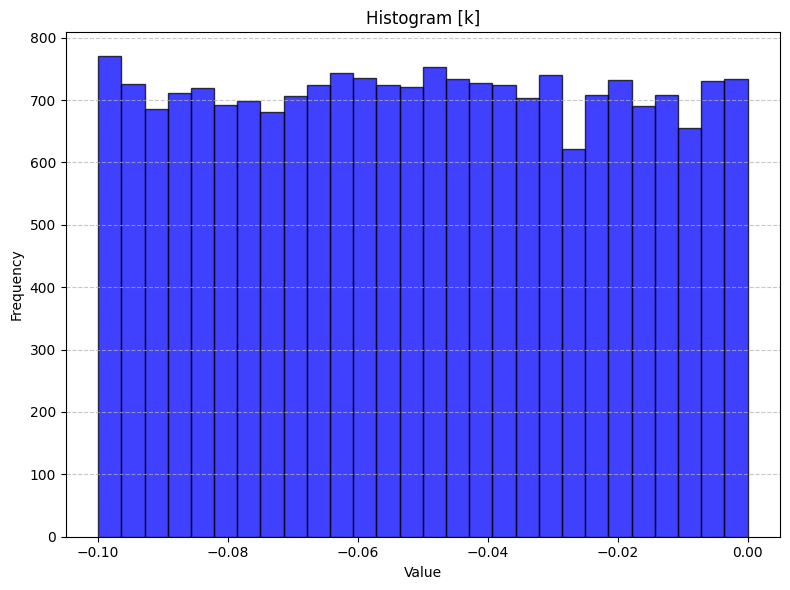

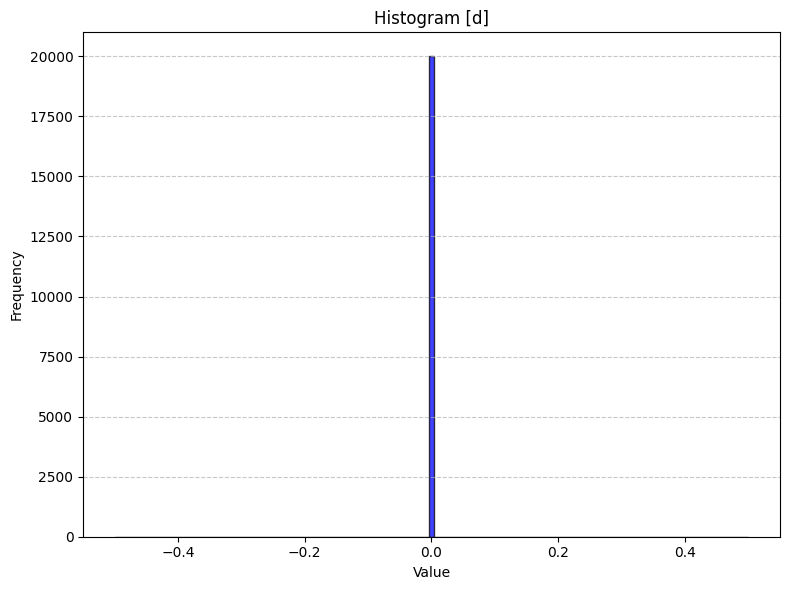

In [4]:
plot_histogram(dataset['n'], 'Histogram [n]')
plot_histogram(dataset['k'], 'Histogram [k]')
plot_histogram(dataset['d'], 'Histogram [d]')

In [5]:
dataset.to_csv(f'generated_datasets/dataset_size_{len(dataset["n"])}.csv', index=False)